In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns" , None)

In [3]:
df = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Iris\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.shape)
print(df.isnull().sum())

(150, 5)
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
df_rev = pd.DataFrame(df)
print(df_rev.shape)

(150, 5)


In [6]:
df_rev.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_rev.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Outlier detection and Treatment

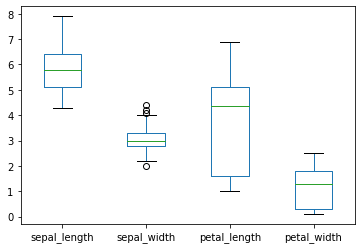

In [8]:
df_rev.plot(kind='box')

In [9]:
#for value in colname:
q1 = df_rev['sepal_width'].quantile(0.25) #first quartile value
q3 = df_rev['sepal_width'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print("Low: ",low)
print("High: ",high)

Low:  2.05
High:  4.05


In [10]:
sep_df_include = df_rev.loc[(df_rev['sepal_width'] >= low) & \
                                (df_rev['sepal_width'] <= high)] # meeting the acceptable range
sep_df_exclude = df_rev.loc[(df_rev['sepal_width'] < low) | \
                               (df_rev['sepal_width'] > high)] #not meeting the acceptable range


In [11]:
print(sep_df_include.shape)
print(sep_df_exclude.shape)

(146, 5)
(4, 5)


In [12]:
sep_mean=int(sep_df_include.sepal_width.mean()) #finding the mean of the acceptable range
print(sep_mean)

3


In [13]:
#imputing outlier values with mean value
sep_df_exclude.sepal_width=sep_mean

In [14]:
#getting back the original shape of df
new_df=pd.concat([sep_df_include,sep_df_exclude]) #concatenating both dfs to get 
#the original shape
new_df.shape

(150, 5)

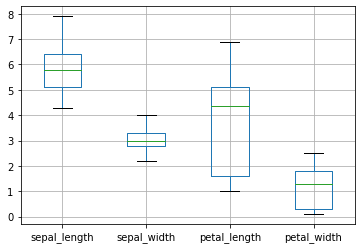

In [15]:
new_df.boxplot()

Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B85DF5608>,
      dtype=object)

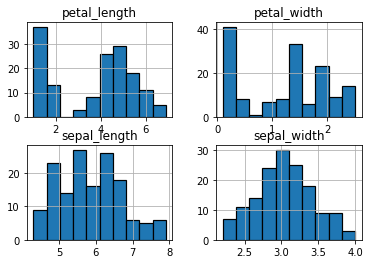

In [16]:
# histograms
new_df.hist(edgecolor='black', linewidth=1.2)

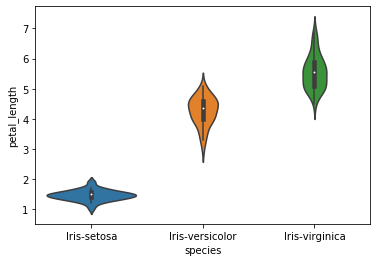

In [17]:
# violinplots on petal-length for each species
sns.violinplot(data=new_df,x="species", y="petal_length")

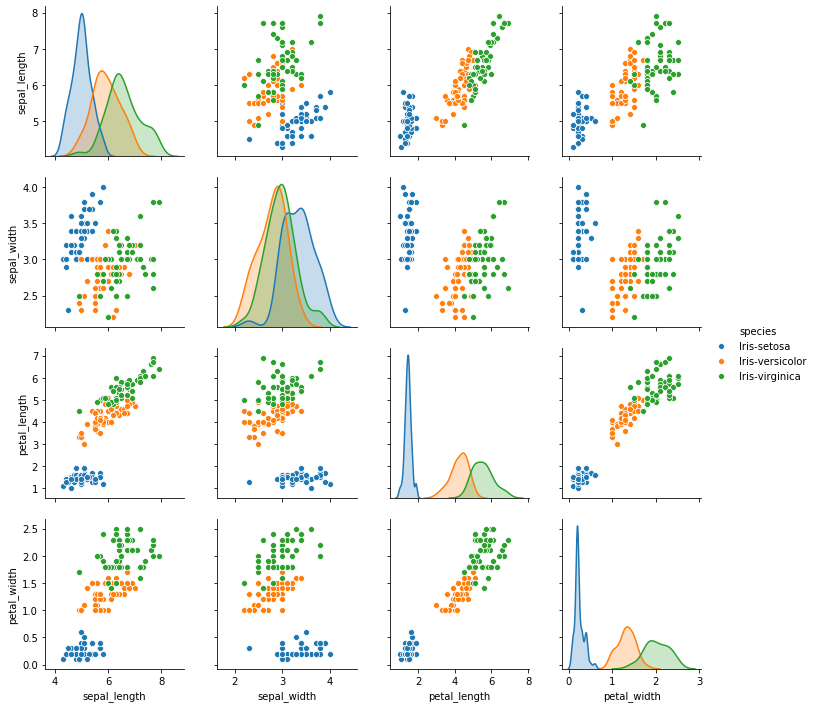

In [18]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(new_df, hue="species")

Converting Data Type and Splitting into X and Y

In [19]:
colname =[]
for j in new_df.columns[:]:
    if new_df[j].dtype == 'object':
        colname.append(j)
colname

['species']

In [20]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    new_df[j] = le.fit_transform(new_df[j].astype(str))

In [21]:
X = new_df.values[:,:-1]
Y = new_df.values[:,-1]
Y = Y.astype(int)

In [22]:
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X)

[[-9.00681170e-01  1.19418523e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -9.26523021e-02 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  4.22082709e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.64715204e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.45155273e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  2.22365525e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  9.36817721e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  9.36817721e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.50019808e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.64715204e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.70892024e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  9.36817721e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -9.26523021e-02 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -9.26523021e-02 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.48102276e+00 -1.45500381e+00 -1.31297673e

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

# Logistic Regression

In [25]:
#Building the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression() # creating the model object
#Fitting the training data in the model
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[-0.52130739  1.31461888 -1.58625069 -1.42463666]
 [-0.18511796 -1.32963475  0.70221013 -0.54625748]
 [ 0.40401909  0.1353905   1.51153941  2.13582813]]
[-1.48449247 -1.00096668 -2.09753913]


In [26]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[12  1  0]
 [ 0 12  6]
 [ 0  1 13]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.86      0.67      0.75        18
           2       0.68      0.93      0.79        14

    accuracy                           0.82        45
   macro avg       0.85      0.84      0.83        45
weighted avg       0.84      0.82      0.82        45

Accuracy of the model: 0.8222222222222222


# Naive Bayes

In [27]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred_NB= classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred_NB))
print(confusion_matrix(Y_test, Y_pred_NB))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred_NB,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.89      0.89        18
           2       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45

[[13  0  0]
 [ 0 16  2]
 [ 0  2 12]]
accuracy is 0.9111111111111111


# Support Vector Machine/Classifier (SVM)

In [28]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, Y_train)

y_pred_SVM = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_SVM))
print(confusion_matrix(Y_test, y_pred_SVM))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_SVM,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95        18
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 18  0]
 [ 0  2 12]]
accuracy is 0.9555555555555556


# K-Nearest Neighbor Classifier (KNN) 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, Y_train)

y_pred_KNN = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_KNN))
print(confusion_matrix(Y_test, y_pred_KNN))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_KNN,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95        18
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 18  0]
 [ 0  2 12]]
accuracy is 0.9555555555555556


# Decision Tree

In [30]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, Y_train)

y_pred_DT = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_DT))
print(confusion_matrix(Y_test, y_pred_DT))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_DT,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.94      0.92        18
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45

[[13  0  0]
 [ 0 17  1]
 [ 0  2 12]]
accuracy is 0.9333333333333333


# K-Means Clustering 

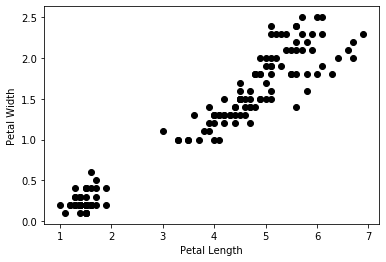

In [42]:
X = new_df[["petal_length","petal_width"]]
#Visualise data points
plt.scatter(X["petal_length"],X["petal_width"],c='black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

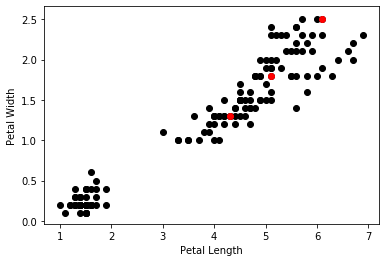

In [45]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["petal_length"],X["petal_width"],c='black')
plt.scatter(Centroids["petal_length"],Centroids["petal_width"],c='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [46]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["petal_length"]-row_d["petal_length"])**2
            d2=(row_c["petal_width"]-row_d["petal_width"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["petal_width","petal_length"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['petal_width'] - Centroids['petal_width']).sum() 
        + (Centroids_new['petal_length'] - Centroids['petal_length']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["petal_width","petal_length"]]

-0.6322720165057251
-0.30318435593114645
-0.07699063688247798
-0.05232365182757914
-0.04085231634838937
-0.014220779220779356
-0.014732835602400352
0.0


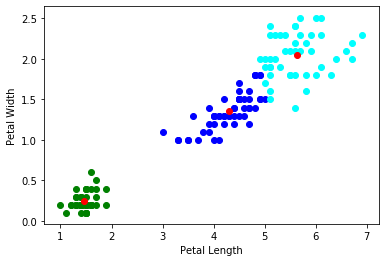

In [47]:
color=['blue','green','cyan']
for k in range(K):
    new_df=X[X["Cluster"]==k+1]
    plt.scatter(new_df["petal_length"],new_df["petal_width"],c=color[k])
plt.scatter(Centroids["petal_length"],Centroids["petal_width"],c='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [50]:
df["Cluster"] = C
df

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [52]:
df["Cluster"] = df.Cluster.map({2:"Sentosa",1:"Versicolor",3:"Virginica"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,Sentosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Sentosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Sentosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Sentosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Sentosa


In [53]:
df.to_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Iris\Iris-Cluster1.csv', index=True)